In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(
    n_samples=[5000, 500, 100],
    n_features=2,
    centers=None,
    cluster_std=[1, 1, 5],
    center_box=(-10.0, 10.0),
    shuffle=False,
    random_state=42,
    return_centers=False,
)

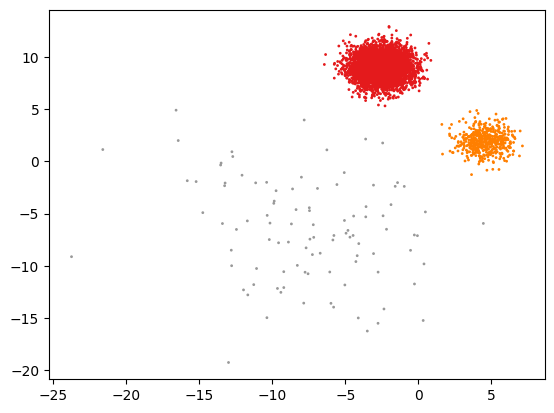

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=1, c=y, cmap='Set1')
ax = plt.gca().axis()
pass

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

## Find distances to nearest neighbor for each point

In [6]:
nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(X)

In [7]:
d, idx = nbrs.kneighbors()

In [8]:
d

array([[0.03890343],
       [0.00974525],
       [0.02458684],
       ...,
       [1.43102321],
       [0.70515588],
       [0.22151798]])

In [9]:
θ = np.median(d, axis=0)[0]
θ

0.027805256808195143

## Find median distance within each cluster

In [10]:
df = pd.DataFrame(np.c_[d, y], columns=['d', 'z'])

In [11]:
summary = df.groupby('z').median()

In [12]:
summary

,d
z,
0.0,0.025515
1.0,0.074711
2.0,0.854134


## Threshold for number of neighbors

 This is tricky to find. It should be something like the median of the target cluster of interest, if we want to keep at least 50% of the data in the target cluster.

In [13]:
summary.loc[1.0, 'd']

0.07471059330636673

In [14]:
rs = nbrs.radius_neighbors(radius=summary.loc[1.0, 'd'], return_distance=False)

In [15]:
rs[y==0][:5]

array([array([2502, 1919, 2011, 4555,  877]),
       array([3722, 1922,   41, 3840, 1091, 2464, 4302, 1506,  720]),
       array([1311, 4023, 2222, 4987, 2497, 4099, 4657,  275]),
       array([3653,   15, 1621, 4319, 2205, 1980, 4363]),
       array([2668, 2182, 4211, 4910])], dtype=object)

In [16]:
rs[y==1][:5]

array([array([], dtype=int64), array([], dtype=int64), array([5185]),
       array([], dtype=int64), array([5248, 5121, 5206])], dtype=object)

In [17]:
rs[y==2][:5]

array([array([], dtype=int64), array([], dtype=int64),
       array([], dtype=int64), array([], dtype=int64),
       array([], dtype=int64)], dtype=object)

## Count number of "near" neighbors for eaach point

In [18]:
ns = np.array([len(r) for r in rs]).astype('float')

In [19]:
ns[y==0][:5]

array([5., 9., 8., 7., 4.])

In [20]:
ns[y==1][:5]

array([0., 0., 1., 0., 3.])

In [21]:
ns[y==2][:5]

array([0., 0., 0., 0., 0.])

In [22]:
od = np.percentile(ns, 1)
td = np.percentile(ns[y==1], 50)

In [23]:
od

0.0

In [24]:
td

0.5

## Use filtering rule to down-sample

Default is to keep — i.e. p = 1.0

In [25]:
p_keep = np.ones_like(y, 'float')

In [26]:
p_keep[ns <= od] = 0

Note: p_keep needs to be a float array or else the next step will use integer division and all values will be 0

In [27]:
p_keep[ns > td] = td/ns[ns > td]

In [28]:
r = np.random.rand(len(p_keep))

In [29]:
keep = r < p_keep

In [30]:
X1 = X[keep, :]

In [31]:
y1 = y[keep]

## Plot results

In [32]:
len(y), len(y1)

(5600, 689)

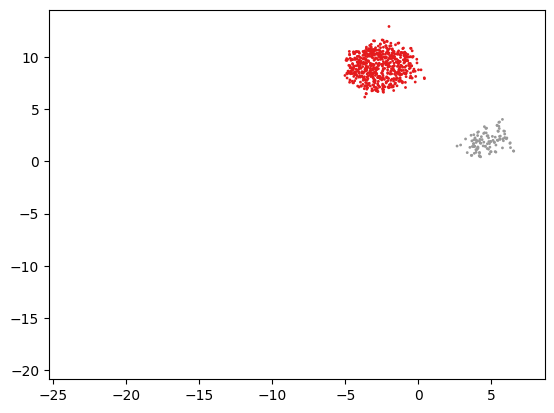

In [33]:
plt.scatter(X1[:, 0], X1[:, 1], s=1, c=y1, cmap='Set1')
plt.axis(ax)
pass